#**🎮 게임 판매실적 분석 🎮**  

게임 판매량 분석을 통해 과거와 최근 트랜드를 살펴보고, 추 후 게임 개발 방항성을 위하여 분석을 진행  
**Focus:**
1. 지역에 따라서 선호하는 게임 장르가 다를까
2. 연도별 게임의 트렌드가 있을까
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

**데이터 변수 설명**

*   Name : 게임의 이름 
*   Platform : 게임이 지원되는 플랫폼 
*   Year : 게임이 출시된 연도  
*   Genre : 게임의 장르  
*   Publisher : 게임제작사  
*   NA_Sales : 북미지역 판매량  
*   EU_Sales : 유럽지역 판매량 
*   JP_Sales : 일본지역 판매량
*   Other_Sales : 기타지역 판매량
*   Global_Sales : 총 판매량

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CodeStates/Sec.1/Project/vgames2.csv')
df = data.copy().iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


## EDA & Data Wrangling

In [3]:
# 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# 결측치 제거
df = df.dropna(subset=['Genre', 'Year', 'Publisher'])

# 데이터에서 중복값을 제거
df = df.drop_duplicates(subset=['Name', 'Platform', 'Year']).reset_index(drop=True)

In [5]:
# 판매량(Sales) 데이터에서 M문자 제거
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df[sales] = df[sales].replace('[M]', '', regex=True)

# 판매량(Sales) K문자를 포함한 데이터 단위 백만(M)으로 통일
def convert(value):
    value = value.replace('K', '')
    return float(value) / 1000

df['NA_Sales'] = df.apply(lambda df:
    convert(df.NA_Sales) if 'K' in df.NA_Sales else float(df.NA_Sales), axis=1)
df['EU_Sales'] = df.apply(lambda df:
    convert(df.EU_Sales) if 'K' in df.EU_Sales else float(df.EU_Sales), axis=1)
df['JP_Sales'] = df.apply(lambda df:
    convert(df.JP_Sales) if 'K' in df.JP_Sales else float(df.JP_Sales), axis=1)
df['Other_Sales'] = df.apply(lambda df:
    convert(df.Other_Sales) if 'K' in df.Other_Sales else float(df.Other_Sales), axis=1)

In [6]:
# 연도 변수 데이터 변환
df.Year = df.Year.astype(int)

# 총 판매량 변수 생성
df['Global_Sales'] = df.iloc[:, -4:].sum(axis=1).round(2)

# df['Global_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1).round(2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


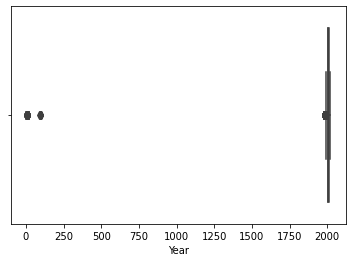

In [7]:
# 그래프를 통해 연도 변수의 데이터 분포 확인
sns.boxplot(df.Year);

In [8]:
# 연도 변수 이상치 확인
df.sort_values('Year').head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9093,Trade & Battle: Card Hero,GB,0,Strategy,Nintendo,0.00,0.00,0.20,0.00,0.20
16041,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00,0.02
14351,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0.00,0.01,0.09
2206,SplashDown,PS2,1,Racing,Atari,0.34,0.27,0.00,0.09,0.70
8507,NCAA Football 2002,PS2,1,Sports,Electronic Arts,0.77,0.60,0.00,0.20,1.57
10938,Momotarou Dentetsu 11,GC,2,Misc,Hudson Soft,0.00,0.00,0.07,0.00,0.07
15272,Rally Fusion: Race of Champions,PS2,2,Racing,Activision,0.06,0.05,0.00,0.02,0.13
7983,ESPN NFL Primetime 2002,XB,2,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.01
8734,Mega Man Network Transmission,GC,3,Platform,Capcom,0.13,0.03,0.00,0.00,0.16
8341,SimCity 4,PC,3,Simulation,Electronic Arts,0.01,0.24,0.00,0.05,0.30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


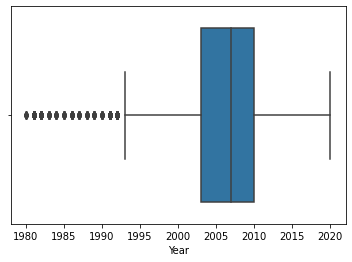

In [9]:
# 연도 데이터의 이상치 수정
df.loc[df.Year < 23, 'Year'] = df.Year + 2000
df.loc[df.Year < 100, 'Year'] = df.Year + 1900

# 이상치 제거 후 연도 변수의 데이터 분포 그래프 확인
sns.boxplot(df.Year);

In [10]:
# 연도 변수 기술 통계 확인
df.Year.describe()

count    16240.000000
mean      2006.406404
std          5.832102
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [11]:
# 연도 변수 확인
df.sort_values('Year')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13957,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
5604,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
14690,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
9044,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
12858,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...
6681,God Eater Off Shot: Soma Shikkuzaru-hen Twin P...,PS4,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
5196,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
9910,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
14902,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


## 1. 지역별 게임 트랜드

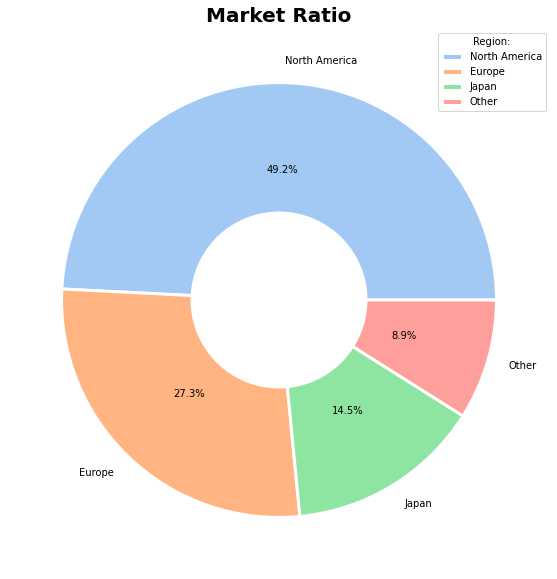

In [12]:
# 지역별 시장 비율
sum_global = df.Global_Sales.sum()
NA_ratio = (df.NA_Sales.sum()) / sum_global
EU_ratio = (df.EU_Sales.sum()) / sum_global
JP_ratio = (df.JP_Sales.sum()) / sum_global
Other_ratio = (df.Other_Sales.sum()) / sum_global

x = np.array([NA_ratio, EU_ratio, JP_ratio, Other_ratio])
labels = ['North America', 'Europe', 'Japan', 'Other']

plt.figure(figsize=(10,10))
plt.pie(x, 
        labels=labels,
        autopct ='%.1f%%',
        colors = sns.color_palette('pastel'),
        wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 3});

plt.title('Market Ratio', fontdict={'fontweight':'bold', 'fontsize':20})
plt.legend(title='Region:')

In [13]:
# 지역별 선호하는 게임 장르
df_genre = df.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum().sort_values('NA_Sales', ascending=False).reset_index(drop=False)
df_genre1 = df_genre.sort_values('EU_Sales', ascending=False).reset_index(drop=True)
df_genre2 = df_genre.sort_values('JP_Sales', ascending=False).reset_index(drop=True)
df_genre3 = df_genre.sort_values('Other_Sales', ascending=False).reset_index(drop=True)
df_genre4 = df_genre.sort_values('Global_Sales', ascending=False).reset_index(drop=True)

df_genre

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,858.75,513.64,156.60,183.99,1712.98
1,Sports,667.26,370.96,134.76,132.35,1305.33
2,Shooter,574.48,310.23,38.18,101.86,1024.75
3,Platform,445.38,200.63,130.53,51.45,827.99
4,Misc,394.73,208.15,104.18,72.64,779.70
5,Racing,354.70,235.02,56.32,76.51,722.55
6,Role-Playing,318.76,183.09,342.93,56.73,901.51
7,Fighting,220.35,99.90,87.14,36.15,443.54
8,Simulation,181.43,112.99,63.54,31.32,389.28
9,Puzzle,121.58,50.47,56.24,12.44,240.73


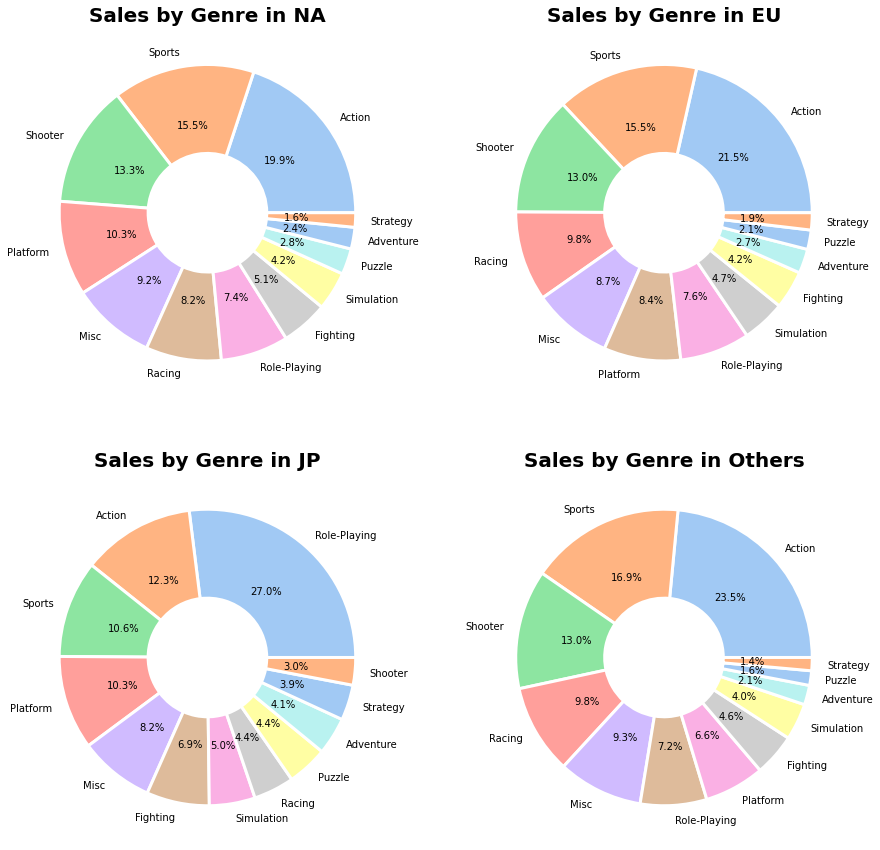

In [14]:
# 지역별 장르 판매량 비율 그래프
fig, ax= plt.subplots(2,2, figsize=(15,15))

ax[0,0].pie(df_genre.NA_Sales,
            labels = df_genre.Genre, 
            autopct ='%.1f%%', 
            colors = sns.color_palette('pastel'),
            wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 3})
ax[0,0].set_title('Sales by Genre in NA', fontdict={'fontweight':'bold', 'fontsize':20})

ax[0,1].pie(df_genre1.EU_Sales, 
            labels = df_genre1.Genre, 
            autopct ='%.1f%%', 
            colors = sns.color_palette('pastel'),
            wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 3})
ax[0,1].set_title('Sales by Genre in EU', fontdict={'fontweight':'bold', 'fontsize':20})

ax[1,0].pie(df_genre2.JP_Sales, 
            labels = df_genre2.Genre, 
            autopct='%.1f%%', 
            colors = sns.color_palette('pastel'),
            wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 3})
ax[1,0].set_title('Sales by Genre in JP', fontdict={'fontweight':'bold', 'fontsize':20})

ax[1,1].pie(df_genre3.Other_Sales, 
            labels = df_genre3.Genre, 
            autopct='%.1f%%', 
            colors = sns.color_palette('pastel'),
            wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 3})
ax[1,1].set_title('Sales by Genre in Others', fontdict={'fontweight':'bold', 'fontsize':20});

## 2. 연도별 게임 트랜드


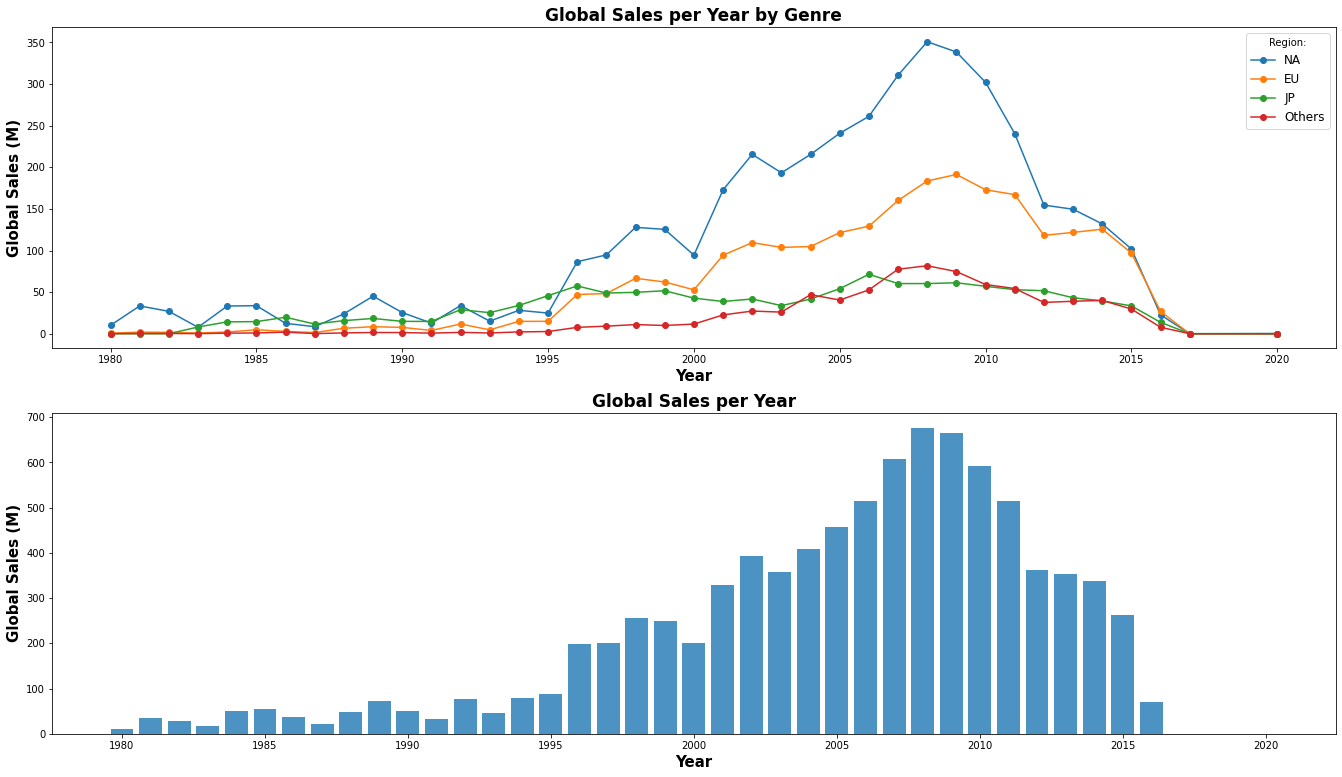

In [15]:
f, axs = plt.subplots(2,1,figsize=(23,13))

# 연도별 지역의 따른 판매량
df_year = df.groupby('Year').sum().reset_index(drop=False)

plt.subplot(2,1,1)

plt.plot(df_year.Year, df_year.NA_Sales, marker='o')
plt.plot(df_year.Year, df_year.EU_Sales, marker='o')
plt.plot(df_year.Year, df_year.JP_Sales, marker='o')
plt.plot(df_year.Year, df_year.Other_Sales, marker='o')

plt.title('Global Sales per Year by Genre', fontdict={'fontweight':'bold', 'fontsize':17})
plt.xlabel('Year', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.legend(['NA', 'EU', 'JP', 'Others'], title='Region:', fontsize=12)


# 연도별 전세계 총 판매량
plt.subplot(2,1,2)

plt.bar(df_year.Year, df_year.Global_Sales, alpha=0.8)

plt.title('Global Sales per Year', fontdict={'fontweight':'bold', 'fontsize':17})
plt.xlabel('Year', fontdict={'fontsize':15, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':15, 'fontweight':'bold'})

plt.show()

In [16]:
# 최근 연도순 데이터
df.loc[:, ~df.columns.isin(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])].sort_values('Year', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,Global_Sales
6765,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.29
9910,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.03
5196,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.01
14902,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.01
3663,Hatsune Miku: Project Diva X,PS4,2016,Misc,Sega,0.03
1055,Guilty Gear Xrd -Revelator-,PS4,2016,Fighting,PQube,0.07
5296,One Piece: Burning Blood,XOne,2016,Fighting,Namco Bandai Games,0.04
5287,Valentino Rossi: The Game,PC,2016,Racing,Namco Bandai Games,0.01
9786,Revolution: 25th Anniversary Collection,PC,2016,Adventure,Koch Media,0.02
5280,Atelier Shallie Plus: Alchemists of the Dusk Sea,PSV,2016,Role-Playing,Tecmo Koei,0.03


In [17]:
# 연도별 장르에 따른 판매량
df_year_genre = df.groupby(['Year', 'Genre']).sum().reset_index(drop=False)
df_year_genre

,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980,Action,0.32,0.02,0.00,0.00,0.34
1,1980,Fighting,0.72,0.04,0.00,0.01,0.77
2,1980,Misc,2.53,0.15,0.00,0.02,2.70
3,1980,Shooter,6.56,0.43,0.00,0.08,7.07
4,1981,Action,13.86,0.81,0.00,0.12,14.79
...,...,...,...,...,...,...,...
383,2016,Sports,4.57,7.36,0.78,1.92,14.63
384,2016,Strategy,0.11,0.32,0.05,0.04,0.52
385,2017,Action,0.00,0.00,0.01,0.00,0.01
386,2017,Role-Playing,0.00,0.00,0.04,0.00,0.04


In [18]:
# # 연도별 장르에 따른 판매량 그래프
# plt.figure(figsize=(15,15))
# sns.set(font_scale=1.5)
# sns.relplot(data=df_year_genre,
#             x= 'Year', 
#             y='Global_Sales', 
#             col='Genre', 
#             col_wrap=4,
#             kind="line",
#             hue='Genre');

## 3. 최대 판매량의 게임들의 특징

### 최대 판매량별 게임 개별 순위

In [19]:
# 글로벌 판매량별 Top 100 Games
top_games = df.sort_values('Global_Sales', ascending=False).reset_index(drop=True).head(100)
top_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.44
96,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.38
97,Battlefield 3,X360,2011,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
98,The Legend of Zelda: Twilight Princess,Wii,2006,Action,Nintendo,3.83,2.19,0.60,0.70,7.32


### 최대 판매량별 장르 순위

In [20]:
# Top 100 게임 장르별 개수
genre = pd.DataFrame(top_games.Genre.value_counts())
genre

,Genre
Shooter,23
Platform,16
Role-Playing,14
Action,13
Racing,10
Misc,8
Sports,6
Simulation,4
Puzzle,3
Fighting,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


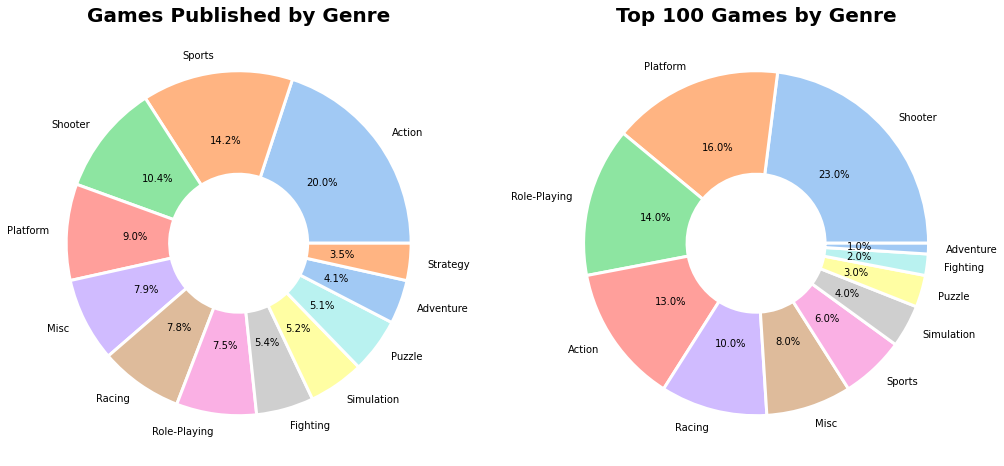

In [21]:
f, axs = plt.subplots(1,2,figsize=(17,10))

# Top 100 게임 장르별 비율
plt.subplot(1,2,2)
plt.pie(genre, 
        labels = genre.index, 
        autopct='%.1f%%', 
        colors = sns.color_palette('pastel'),
        wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 3});

plt.title('Top 100 Games by Genre', fontdict={'fontweight':'bold', 'fontsize':20})

# 총 판매량 장르별 비율
plt.subplot(1,2,1)
plt.pie(df.Genre.value_counts(),
            labels = df_genre.Genre, 
            autopct ='%.1f%%', 
            colors = sns.color_palette('pastel'),
            wedgeprops = {'width': 0.6, 'edgecolor': 'w', 'linewidth': 3})

plt.title('Games Published by Genre', fontdict={'fontweight':'bold', 'fontsize':20});

### 최대 판매량별 플랫폼 순위

In [22]:
# 플랫폼별 총 판매량별 기준 순위
platform = top_games.loc[:, df.columns!='Year'].groupby('Platform').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
platform

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii,158.42,108.65,32.29,30.39,329.75
1,DS,72.66,65.14,52.08,17.30,207.18
2,X360,120.95,51.19,1.43,16.38,189.95
3,GB,66.35,27.12,31.63,3.59,128.69
4,PS3,41.38,46.52,4.73,18.87,111.50
5,NES,70.94,8.83,11.63,1.89,93.29
6,PS2,37.60,17.57,6.88,22.67,84.72
7,3DS,22.77,17.01,17.13,3.79,60.70
8,PS4,16.41,24.27,1.13,8.19,50.00
9,SNES,26.67,8.85,12.47,1.25,49.24


### 최대 판매량별 게임제작사 순위

In [23]:
# 게임제작사별 총 판매량액 기준 순위
publisher = top_games.loc[:, df.columns!='Year'].groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).reset_index(drop=False).head(10)
publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,436.10,240.90,170.81,56.99,904.80
1,Activision,91.57,57.61,3.44,20.60,173.22
2,Take-Two Interactive,59.69,40.48,3.39,25.59,129.15
3,Sony Computer Entertainment,30.42,23.98,15.33,13.43,83.16
4,Microsoft Game Studios,49.00,16.47,0.56,5.24,71.27
5,Electronic Arts,10.54,22.95,0.47,5.90,39.86
6,Ubisoft,11.89,6.04,0.01,1.85,19.79
7,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84
8,Sega,2.58,3.90,0.66,0.91,8.05
9,SquareSoft,2.28,1.72,3.63,0.23,7.86


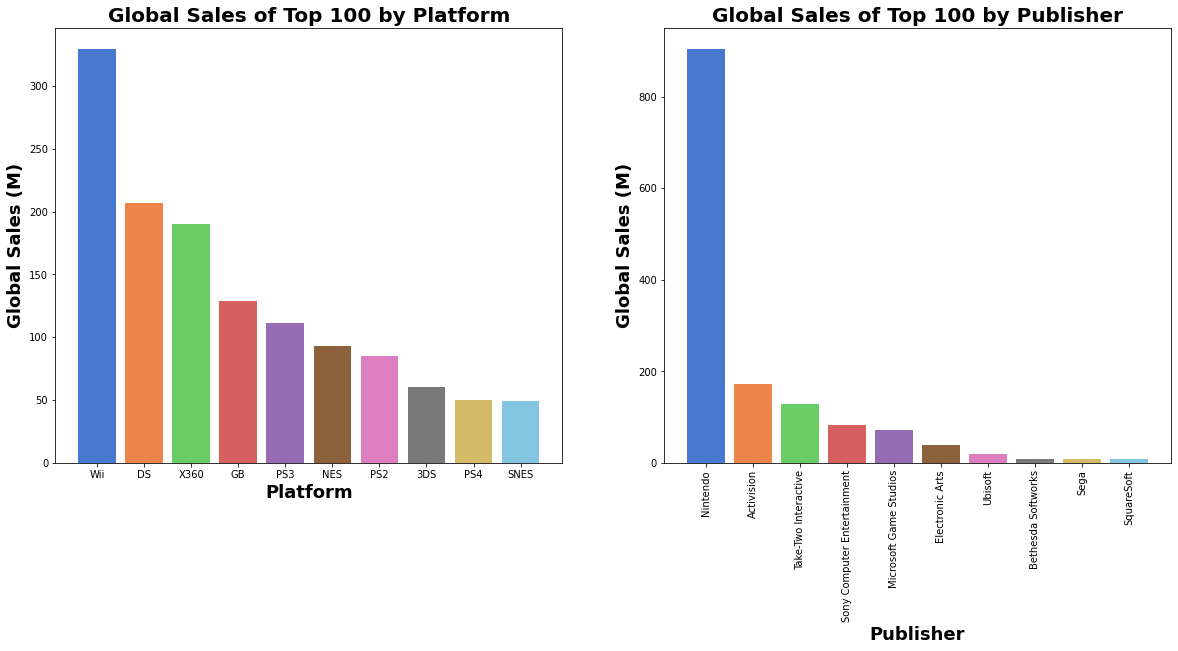

In [24]:
# 게임 플랫폼과 제작사별 총 판매량 시각화
f, axs = plt.subplots(1,2,figsize=(20,8))

# 플랫폼별 역대 총 판매량 그래프
plt.subplot(1,2,1)
plt.bar(platform.Platform,
        platform.Global_Sales,
        color=sns.color_palette("muted"))

plt.title('Global Sales of Top 100 by Platform', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Platform', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':18, 'fontweight':'bold'});

# 게임제작사별 역대 판매량 그래프
plt.subplot(1,2,2)
plt.bar(publisher.Publisher,
        publisher.Global_Sales,
        color=sns.color_palette("muted"))

plt.title('Global Sales of Top 100 by Publisher', fontdict={'fontweight':'bold', 'fontsize':20})
plt.xlabel('Publisher', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.ylabel('Global Sales (M)', fontdict={'fontsize':18, 'fontweight':'bold'})
plt.xticks(rotation = 90);

##정리:


*   게임 플랫폼: Wii, DS, Xbox Series
*   수익성이 높은 시장: 미국, 유럽
*   게임 장르: Action, Sports, Shooter  
    또는 Role-Playing으로 일본 시장 집중 공략
*   인기 게임출판사 Nintendo 또는 Activision과 함께 공동 제작